# Sentiment Analysis

![alt text](images/sentimentplot.png "Title")

### Table of Contents ###
> Part 1: [Analyzing Trends by Time](Part 1 - Analyzing Trends by Time.ipynb)

> Part 2: [Discovering Channel Keywords](Part 2 - Discovering Channel Keywords.ipynb)

> Part 3: [Channel Clustering](Part 3 - Channel Clustering.ipynb)

> Part 4: **[Sentiment Analysis]**

How do you measure *sentiment*? Now this is a really tricky subject. 

[Sentiment Analysis](https://www.lexalytics.com/technology/sentiment) is not an exact science, but there are a number of metrics that attempt to quantify 'sentiment' of words. For social media and microblogs, a dictionary-based sentiment module [ANEW](http://neuro.imm.dtu.dk/wiki/ANEW) (Affective Norms for English Words) [has had some success](https://arxiv.org/abs/1103.2903). The ANEW dictionary is a list constructed by Bradley and Lang from University of Florida, and contains 1034 words rated for valence, arousal and dominance. 

The two main measures of ANEW are
* Arousal: measure of calm to excited, on a scale of 0-9
* Valence: measure of pleasant to unpleasant, on a scale of 0-9

Let's see a couple demonstrations to get a better idea.

### Examples of ANEW

In [34]:
from anew_module import anew

A word like 'fun' has high arousal and high valence, compared to 'boring', which has low arousal, low valence

In [54]:
print anew.sentiment('fun')
print anew.sentiment('boring')

{'arousal': 7.22, 'valence': 8.37}
{'arousal': 2.9, 'valence': 2.83}


'Love' and 'Hate' score similarly on arousal because they are both words with a lot of energy. They are on opposites however, on valence measures.

In [61]:
print anew.sentiment('love')
print anew.sentiment('hate')

{'arousal': 6.44, 'valence': 8.72}
{'arousal': 6.95, 'valence': 2.12}


### Applying on Slack

In [4]:
import pandas as pd
import re
import string
from anew_module import anew

data = pd.read_csv('data/concatenated.csv', header = 0)

Before applying ANEW, we will convert all words to lower case and remove punctuation.

In [6]:
punc = re.compile( '[%s]' % re.escape( string.punctuation ) )
data['cleaned'] = data['text'].apply(lambda x: punc.sub(' ',str(x).lower()))

In [7]:
data['arousal'] = data['cleaned'].apply(lambda x: anew.sentiment(str(x).split())['arousal'])
data['valence'] = data['cleaned'].apply(lambda x: anew.sentiment(str(x).split())['valence'])

Let's examine how the sentiments are distributed.

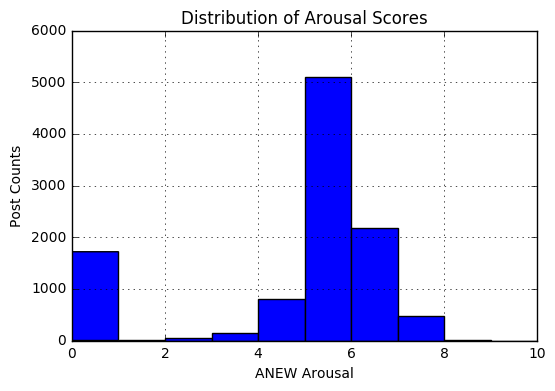

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = data['arousal'].hist(bins = 10, range = (0,10));
ax.set_title('Distribution of Arousal Scores');
ax.set_xlabel('ANEW Arousal');
ax.set_ylabel('Post Counts');

There are a bunch of posts with 0 score, and others mostly centered around 4-7. When there is a sentiment, it seems people are on the more high end than the low end though.

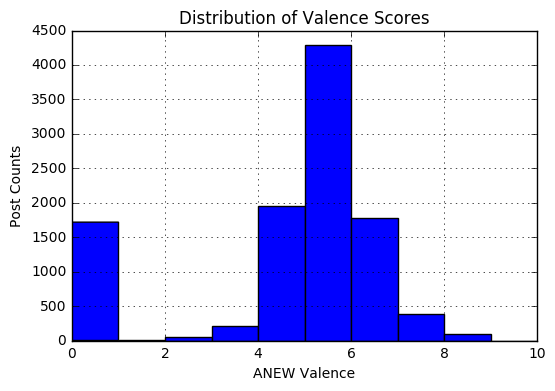

In [126]:
ax = data['valence'].hist(bins = 10, range = (0,10));
ax.set_title('Distribution of Valence Scores');
ax.set_xlabel('ANEW Valence');
ax.set_ylabel('Post Counts');

Again, a bunch with 0, but mostly between 4-7. We have more 9s than the graph above.  

Now comes the real exciting part. Let's map out the sentiment of every single post! We'll plot a 2-dimensional plot of the scores, segmented by channel. 

![alt text](images/tableau_sentiment.png "Title")

### [Visualize Results Interactively](https://public.tableau.com/profile/jordan.stauss#!/vizhome/3sentimentpresentation/ChannelSentiment)

To wrap it up, sentiment analysis is not an exact science. Sentiment is complex. Sentiment is also very contextual. A dictionary based sentiment cannot possibly capture sarcasm, or different level of valence of a word used in a different context. However, these measures give an overarching baseline, and can be used to see how one text measures relative to another. 

And that wraps up the series on Slack analysis. I hope you enjoyed this microblog! 

### Previous Series ###
> Part 1: [Analyzing Trends by Time](Part 1 - Analyzing Trends by Time.ipynb)

> Part 2: [Discovering Channel Keywords](Part 2 - Discovering Channel Keywords.ipynb)

> Part 3: [Channel Clustering](Part 3 - Channel Clustering.ipynb)

> Part 4: **[Sentiment Analysis]**